# Single Layer Network Example

Note: This notebook is desinged to run with Python3 and CPU (no GPU) runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_cpu.png)

####[SNE-01]
Import modules and set random seeds.

In [1]:
import numpy as np
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras import layers
from keras import models

np.random.seed(20160614)
tf.set_random_seed(20190212)

plt.rcParams['axes.facecolor'] = 'white'

Using TensorFlow backend.


####[SNE-02]
Generate a training dateset.

In [0]:
def generate_datablock(n, mu, var, t):
    data = multivariate_normal(mu, np.eye(2)*var, n)
    df = DataFrame(data, columns=['x1', 'x2'])
    df['t'] = t
    return df

df0 = generate_datablock(15, [7-15, 7-15], 22, 0)
df1 = generate_datablock(15, [22-15, 7-15], 22, 0)
df2 = generate_datablock(10, [7-15, 22-15], 22, 0)
df3 = generate_datablock(25, [20-15, 20-15], 22, 1)

df = pd.concat([df0, df1, df2, df3], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

####[SNE-03]
Store the coordinates $(x_1,x_2)$ and label values $t$ into NumPy arrays.

In [0]:
train_x = train_set[['x1', 'x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])

####[SNE-04]
Define a model for the binary classification using a single hidden layer.

In [4]:
model = models.Sequential()
model.add(layers.Dense(2, activation='tanh', input_shape=(2,),
                       name='hidden'))
model.add(layers.Dense(1, activation='sigmoid',
                       name='output'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 2)                 6         
_________________________________________________________________
output (Dense)               (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


####[SNE-05]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

####[SNE-06]
Train the model.

In [6]:
history = model.fit(train_x, train_t,
                    batch_size=len(train_set), epochs=5000, verbose=0)

Instructions for updating:
Use tf.cast instead.


####[SNE-07]
Plot charts for the accuracy and loss values.

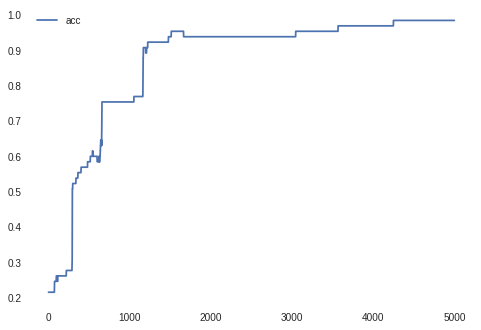

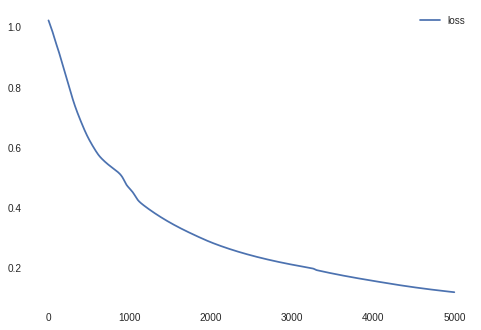

In [7]:
DataFrame({'acc': history.history['acc']}).plot()
DataFrame({'loss': history.history['loss']}).plot()

####[SNE-08]
Plot charts for the final result.

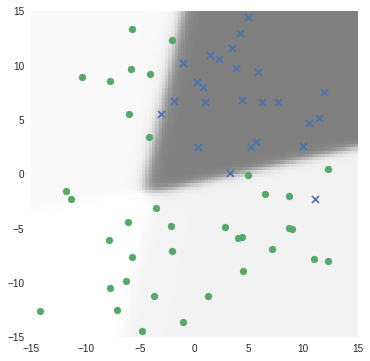

In [8]:
train_set1 = train_set[train_set['t']==1]
train_set2 = train_set[train_set['t']==0]

fig = plt.figure(figsize=(6, 6))
subplot = fig.add_subplot(1, 1, 1)
subplot.grid(None)
subplot.set_ylim([-15, 15])
subplot.set_xlim([-15, 15])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set2.x1, train_set2.x2, marker='o')

locations = [[x1, x2] for x2 in np.linspace(-15, 15, 100) 
                      for x1 in np.linspace(-15, 15, 100)]
p_vals = model.predict(np.array(locations)).reshape((100, 100))
subplot.imshow(p_vals, origin='lower', extent=(-15, 15, -15, 15),
               cmap=plt.cm.gray_r, alpha=0.5)